In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import folium
import requests

In [ ]:
# Random Import Code
# !unzip /content/hotel_515k_data.zip
# import os
# print(os.getcwd())
# !ls /content
# csv_path = '/content/Hotel_Reviews.csv'
# hotel_df = pd.read_csv(csv_path)

In [ ]:
# The other code you used part 1
# ! pip install kaggle

# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# The other code you used part 2
# ! kaggle datasets download jiashenliu/515k-hotel-reviews-data-in-europe
# ! unzip 515k-hotel-reviews-data-in-europe

In [ ]:
# Don't use if you are not using drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Stats_Hotel_Data'

/content/drive/My Drive/Stats_Hotel_Data


In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
hotel_df = pd.read_csv('Hotel_Reviews.csv')

# View the first 5 rows of the DataFrame
hotel_df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
hotel_df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

If you want to do something that is not generic, you could try to focus on a specific aspect of the hotel experience that you want to analyze sentiment for. For example, you could focus on the sentiment around the hotel's food or the cleanliness of the rooms. This would allow you to go beyond the generic overall sentiment analysis and provide more specific insights.

Additionally, you could consider combining the sentiment analysis with other data sources to provide a more comprehensive analysis. For example, you could combine the hotel reviews with social media data to see how the sentiment around the hotel compares to other hotels in the area or to get a better understanding of the demographic that is more likely to stay at the hotel.

Ultimately, the key to a successful sentiment analysis project is to identify a clear research question or hypothesis and then design your analysis to answer that question.
Ideas: Generating a map of the locations of the hotels ; Tying up with different factors using Sentiment Analysis
7 layered map for each of the facilities below mentioned. Training BERT to assign values for these fields between 0-5 or 0-10 or 0-100 and then make a map
Gibbletar — 03/06/2023 3:03 PM
Location: How convenient is the hotel's location for the guest's purpose of travel, such as sightseeing or business meetings?

Cleanliness: How clean and well-maintained are the rooms, common areas, and amenities of the hotel?

Service: How friendly, helpful, and responsive are the hotel staff in meeting the needs and requests of guests?

Comfort: How comfortable and well-appointed are the rooms, bedding, and furnishings of the hotel?

Facilities: How comprehensive and high-quality are the facilities and amenities provided by the hotel, such as fitness centers, swimming pools, restaurants, and bars?

Value for money: How good is the value proposition of the hotel, in terms of price, quality, and overall experience?

Accessibility: How easy is it to access the hotel, such as through public transportation, parking, or shuttle services?




In [ ]:
# Finding the number of null values:
# Find percentage of null values in each column
null_perc = hotel_df.isnull().sum() / len(hotel_df) * 100
print(null_perc)


Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.633655
lng                                           0.633655
dtype: float64


In [ ]:
hotel_df.dropna(subset=['lat', 'lng'], inplace=True)

No Null values now bro

In [ ]:
# Let's make some data conversions:

object_cols = ['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags']
for col in object_cols:
    hotel_df[col] = hotel_df[col].astype(str)

date_cols = ['Review_Date']
for col in date_cols:
    hotel_df[col] = pd.to_datetime(hotel_df[col], format='%m/%d/%Y')

hotel_df['days_since_review'] = pd.to_numeric(hotel_df['days_since_review'].str.extract('(\d+)')[0])

# print the updated data types of all columns
print(hotel_df.dtypes)


Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                      int64
lat                                                  float64
lng                     

In [ ]:
# Finding the data type that ach of the columns belongs to:
dtypes = hotel_df.dtypes

# Make lists to hold continous, categorical and other columns
cat_cols = []
cont_cols= []

# Loop through all the columns, assigning them to appropirate lists
for col in dtypes.index:
  if dtypes[col] == 'object':
    cat_cols.append(col)
  if dtypes[col] == 'int64' or dtypes[col] == 'float64':
    cont_cols.append(col)


# Print the lists:
print("Categorical Columns are:", cat_cols)
print("Continous Columns are:", cont_cols)

Categorical Columns are: ['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags']
Continous Columns are: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review', 'lat', 'lng']


In [ ]:
print(dtypes)

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                      int64
lat                                                  float64
lng                     

Tasks:
First Find how many unqie Nationalities, Hotels are there

In [ ]:
# Unique values in the Reviewer_Nationality column
hotel_df['Reviewer_Nationality'].nunique()

227

In [ ]:
# Unique values in the Hotel_Name column
hotel_df['Hotel_Name'].nunique()

1475

In [ ]:
hotel_df.shape

(512470, 17)

In [ ]:
# Let's check the bottom 15 least occurring nationalities
country_counts = hotel_df['Reviewer_Nationality'].value_counts()

# Get the bottom 10 counts
bottom_10_counts = country_counts.tail(25)

# Print the bottom 10 counts
print(bottom_10_counts)


 Liberia                           3
 Central Africa Republic           3
 Bonaire St Eustatius and Saba     3
 South Sudan                       2
 Cocos K I                         2
 Saint Vincent Grenadines          2
 Eritrea                           2
 American Samoa                    2
 St Pierre and Miquelon            2
 Cook Islands                      2
 Kiribati                          2
 Djibouti                          2
 Wallis and Futuna                 2
 Niger                             2
 Montserrat                        2
 Equatorial Guinea                 2
 Svalbard Jan Mayen                1
 Vatican City                      1
 Anguilla                          1
 Comoros                           1
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, dtype: int64


In [ ]:
counts = hotel_df['Reviewer_Nationality'].value_counts()
n_countries_less_than_10 = (counts < 10).sum()
n_countries_less_than_20 = (counts < 20).sum()
print("Number of countries with less than 10 counts:", n_countries_less_than_10)
print("Number of countries with less than 20 counts:", n_countries_less_than_20)

Number of countries with less than 10 counts: 64
Number of countries with less than 20 counts: 85


In [ ]:
hotel_review_counts = hotel_df['Hotel_Name'].value_counts()
num_hotels_50_reviews = (hotel_review_counts < 50).sum()
num_hotels_100_reviews = (hotel_review_counts < 100).sum()
print("Number of Hotels with less than 50 counts:", num_hotels_50_reviews)
print("Number of Hotels with less than 100 counts:", num_hotels_100_reviews)

Number of Hotels with less than 50 counts: 154
Number of Hotels with less than 100 counts: 404


In [ ]:
hotel_df['Total_Number_of_Reviews'].mean()


2747.5049017503466

On Average, there are 2743 reviews per hotel.

Exploratory Questions:   
1) How does the Rating Distribution look like?  
2) Make Histograms pairwise stuff.   
3) What are the Common Reviewer Nationalities? a) Word Cloud b) Plots  
4) What are the top 10 best Hotels w.r.t Reviews?  
5) What are the bottom 10 worst Hotels w.r.t Reviews?  
6) Make Continents outta the countries  

--------------------------------------------------------------------
Data Cleaning:  
1) Look For Duplicated records


### 1) Distribution of Average_Score

<ipython-input-23-7a1f30b45819>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hotel_df['Average_Score'], shade=True, color='blue')


<Axes: xlabel='Average_Score', ylabel='Density'>

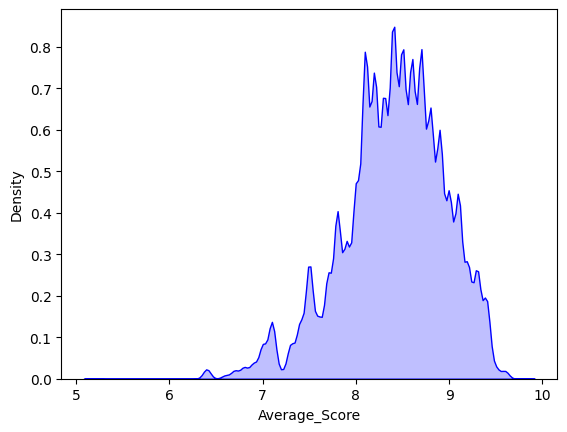

In [ ]:
# 1) Plotting the distribution of Average_Score
sns.kdeplot(hotel_df['Average_Score'], shade=True, color='blue')

In [ ]:
# Most Frequently Occurring Average_Score
top_scores = hotel_df['Average_Score'].value_counts().nlargest(6)
print(top_scores)

8.4    41165
8.1    38073
8.5    37821
8.7    37798
8.6    36321
8.2    34847
Name: Average_Score, dtype: int64


In [ ]:
# group hotels by name and get the average score for each hotel
hotel_scores = hotel_df.groupby('Hotel_Name')['Average_Score'].mean().reset_index()

# sort hotels by average score in descending order
sorted_hotels = hotel_scores.sort_values(by='Average_Score', ascending=False)

# get the hotel with the highest average score
highest_rated_hotel = sorted_hotels.iloc[0]['Hotel_Name']

# get the number of ratings for the highest rated hotel
num_ratings = hotel_df[hotel_df['Hotel_Name'] == highest_rated_hotel]['Hotel_Name'].count()

# print the hotel name and number of ratings
print(f"The highest rated hotel is {highest_rated_hotel} with {num_ratings} ratings.")


The highest rated hotel is Ritz Paris with 28 ratings.


In [ ]:
highest_rated_hotel = hotel_df.loc[hotel_df['Average_Score'].idxmax(), 'Hotel_Name']
highest_rating = hotel_df['Average_Score'].max()

print("The highest rated hotel is:", highest_rated_hotel)
print("The rating for the highest rated hotel is:", highest_rating)


The highest rated hotel is: Ritz Paris
The rating for the highest rated hotel is: 9.8


The Ritz Paris hotel seems to be the most rated hotel in the dataset, with 28 ratings and a highest rating of 9.8

In [ ]:
len(hotel_df.select_dtypes(include=['float64', 'int64']).columns)

10

### 2) The Histogram of Contionous columns to understand the distributions

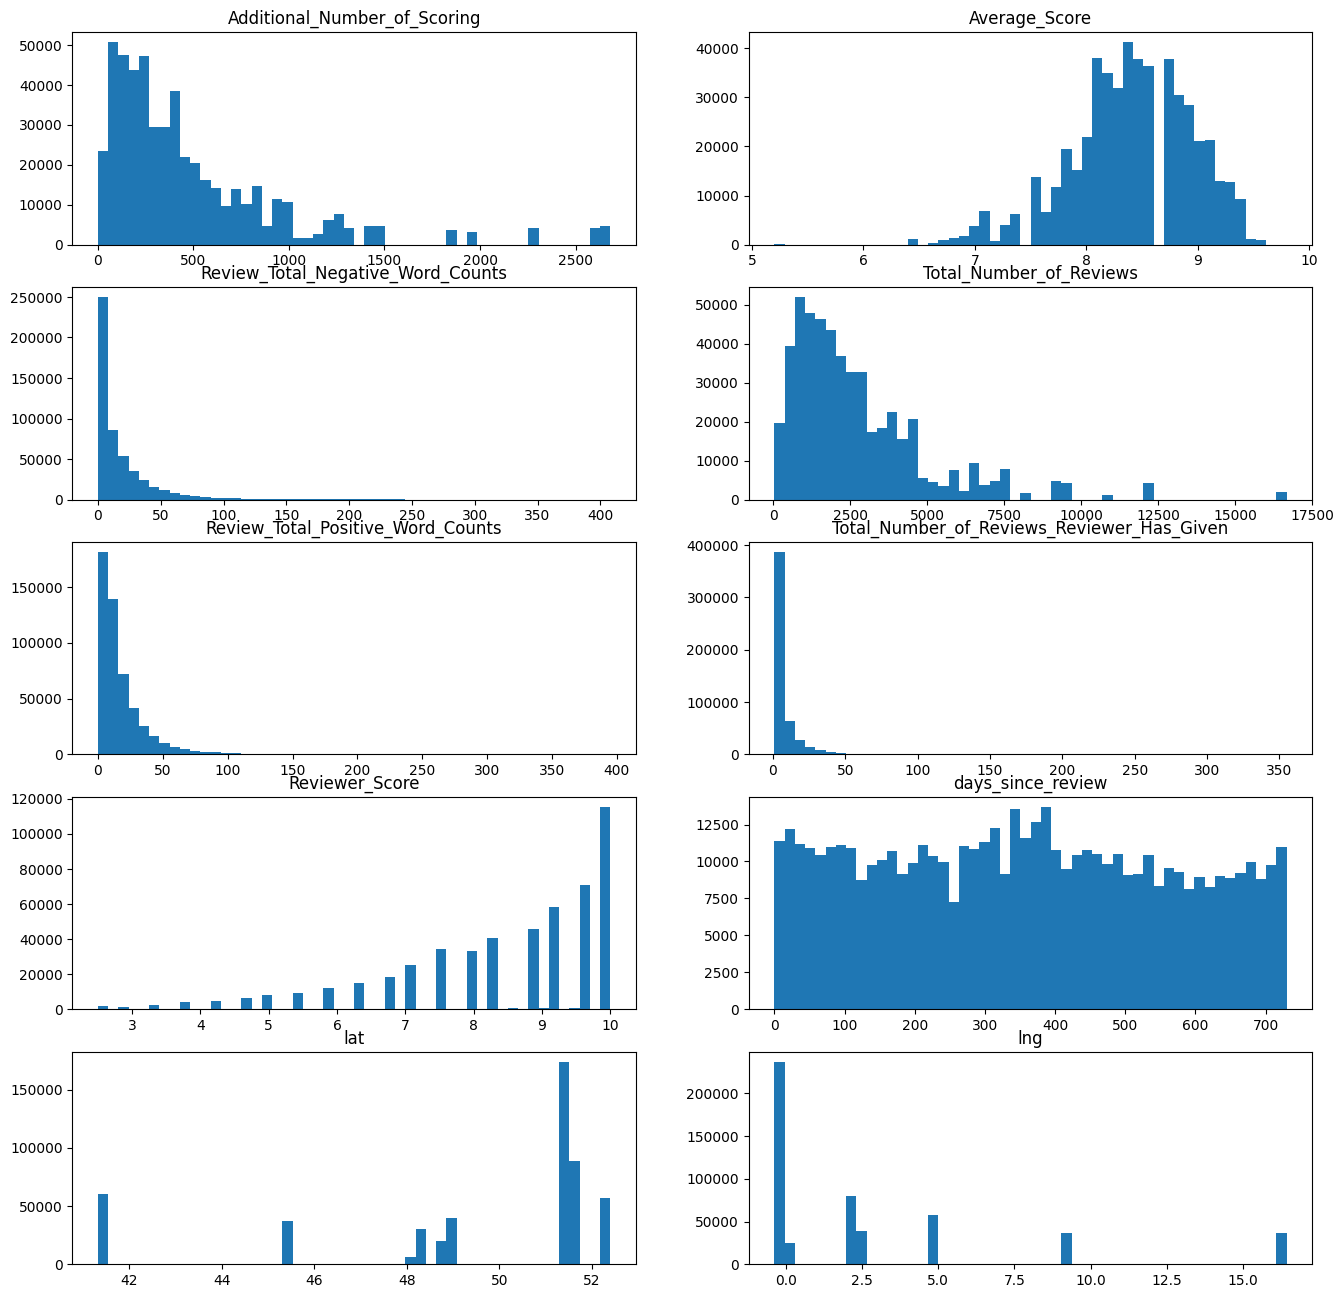

In [ ]:
# Define number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten the axes array
axes = axes.flatten()

# Loop over the continuous columns
for i, col in enumerate(cont_cols):
    # Plot a histogram for the column on the current subplot
    axes[i].hist(hotel_df[col], bins=50)

    # Set the title of the subplot to the column name
    axes[i].set_title(col)

# Remove the unused subplots
for i in range(len(cont_cols), num_rows*num_cols):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

###  3.a) Nationalities Analysis: Wordcloud


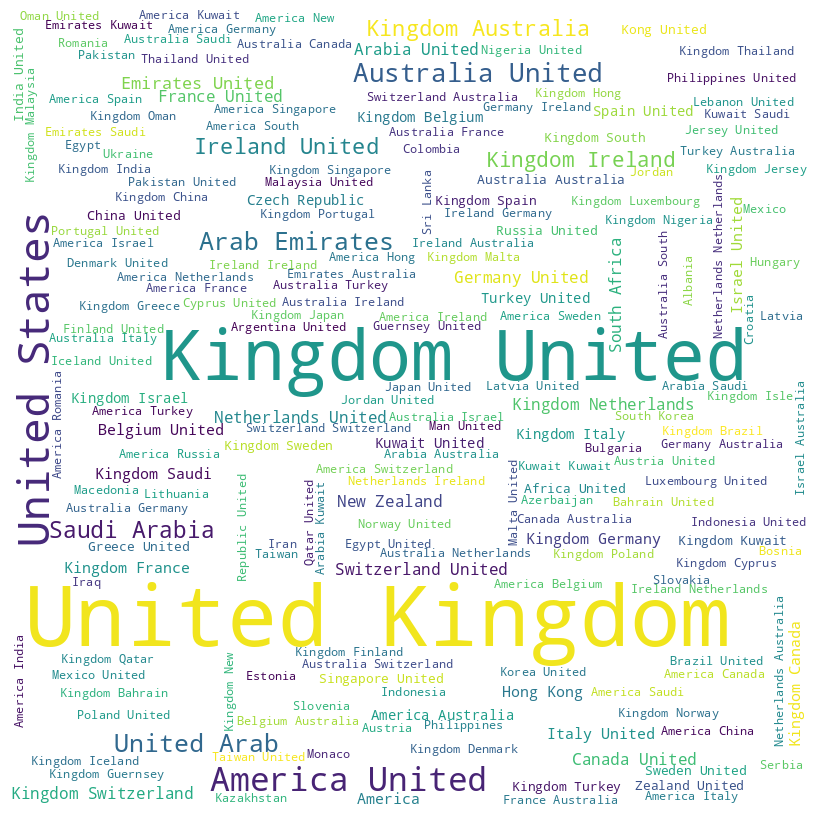

In [ ]:
#  list of all the reviewer nationalities:
nationalities = hotel_df['Reviewer_Nationality'].tolist()

# Create a string of all the nationalities:
nationalities_text = ' '.join(str(nationality) for nationality in nationalities)

# Create a WordCloud object:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(nationalities_text)

# Display the word cloud using matplotlib:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 3.b) Nationalities Analysis: Countries with most no. of reviews


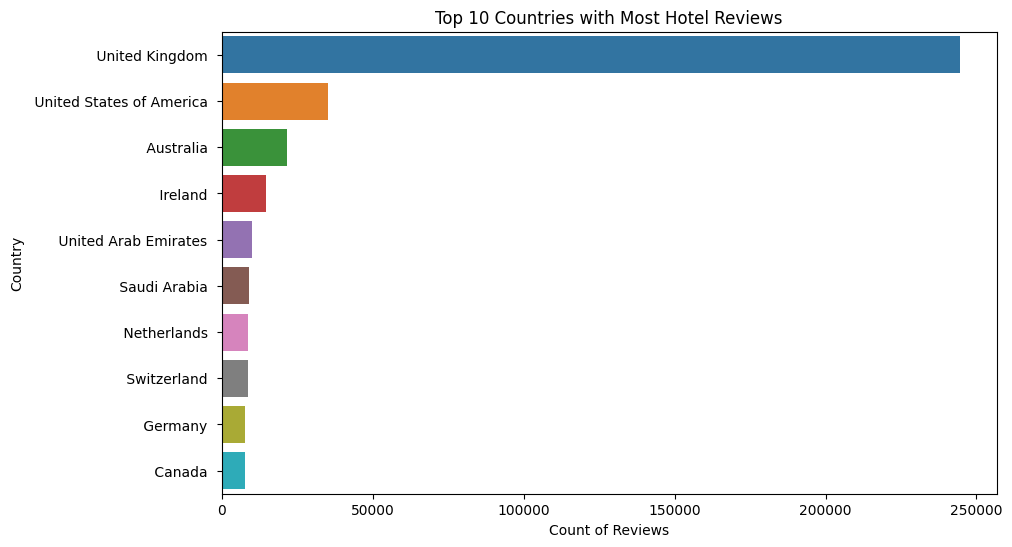

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Reviewer_Nationality', data=hotel_df, order=hotel_df['Reviewer_Nationality'].value_counts().iloc[:10].index)
plt.xlabel('Count of Reviews')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Hotel Reviews')
plt.show()


#### 3.c) Nationalities Analysis: Countries with least no. of reviews


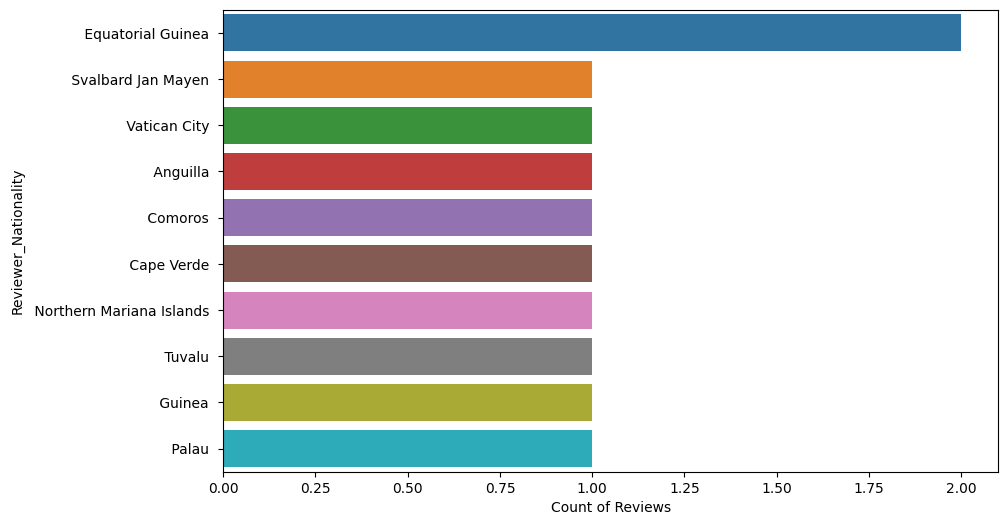

In [ ]:
# Create a horizontal countplot
plt.figure(figsize=(10,6))
sns.countplot(y='Reviewer_Nationality', data=hotel_df, order=hotel_df['Reviewer_Nationality'].value_counts().tail(10).index)
plt.xlabel('Count of Reviews')
plt.show()


### 4) Top 10 Best Hotels w.r.t Reviews

In [ ]:
# Filter the top 10 and bottom 10 hotels by average score
top_10_hotels = hotel_df[['Hotel_Name', 'Average_Score']].drop_duplicates().nlargest(10, 'Average_Score')
bottom_10_hotels = hotel_df[['Hotel_Name', 'Average_Score']].drop_duplicates().nsmallest(10, 'Average_Score')

# Merge the top 10 and bottom 10 into a single dataframe
hotel_table = pd.concat([top_10_hotels, bottom_10_hotels], axis=0)

# Add a column for rankings
hotel_table['Ranking'] = [i for i in range(1, 11)] + [i for i in range(1475, 1465, -1)]

# Print the table
print(hotel_table[:10])
print('-' * 75)
print(hotel_table[10:])

                                 Hotel_Name  Average_Score  Ranking
54717                            Ritz Paris            9.8        1
14708                       Haymarket Hotel            9.6        2
176997  H tel de La Tamise Esprit de France            9.6        3
185602                                   41            9.6        4
316447                    Hotel Casa Camper            9.6        5
398945                     Hotel The Serras            9.6        6
402244                H10 Casa Mimosa 4 Sup            9.6        7
11259            Milestone Hotel Kensington            9.5        8
53756                Charlotte Street Hotel            9.5        9
81043             Hotel The Peninsula Paris            9.5       10
---------------------------------------------------------------------------
                                      Hotel_Name  Average_Score  Ranking
494791                             Hotel Liberty            5.2     1475
242324                        

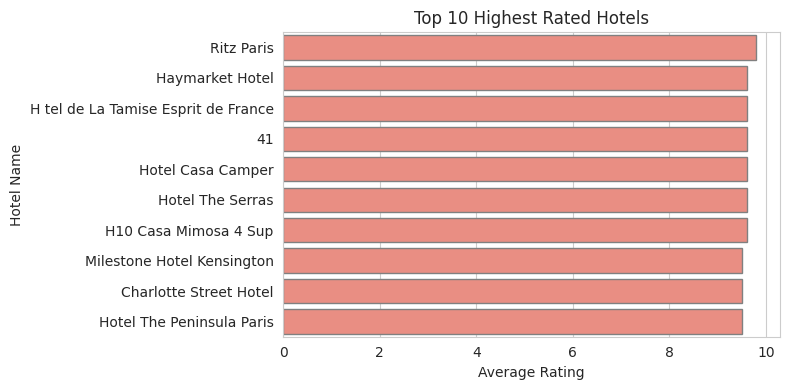

In [ ]:
# Filter the top 10 highest rating hotels
top_10_hotels = hotel_df[['Hotel_Name', 'Average_Score']].drop_duplicates().nlargest(10, 'Average_Score')

# Horizontal bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='Average_Score', y='Hotel_Name', data=top_10_hotels, color='salmon', edgecolor='gray')

ax.set_title('Top 10 Highest Rated Hotels')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Hotel Name')
ax.tick_params(axis='both', labelsize=10)  # reduce the font size of the tick labels
plt.tight_layout()  # adjust the padding of the plot
plt.show()


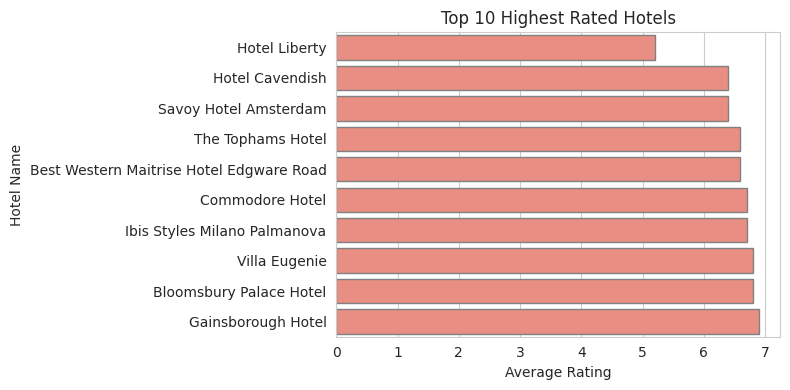

In [ ]:
# Filter the top 10 highest rating hotels
top_10_hotels = hotel_df[['Hotel_Name', 'Average_Score']].drop_duplicates().nsmallest(10, 'Average_Score')

# Horizontal bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='Average_Score', y='Hotel_Name', data=top_10_hotels, color='salmon', edgecolor='gray')

ax.set_title('Top 10 Highest Rated Hotels')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Hotel Name')
ax.tick_params(axis='both', labelsize=10)  # reduce the font size of the tick labels
plt.tight_layout()  # adjust the padding of the plot
plt.show()


### 5) Plot the locations of the most popular hotels:

In [ ]:
import folium

# Filter the top 5 highest rating hotels
top_5_hotels = hotel_df[['Hotel_Name', 'Average_Score', 'lat', 'lng']].drop_duplicates().nlargest(5, 'Average_Score')
# top_10_hotels = hotel_df[['Hotel_Name', 'Average_Score', 'lat', 'lng']].drop_duplicates().nlargest(10, 'Average_Score')
ax.set_xlim()
ax.set_ylim()

# Create a map centered on the average latitude and longitude of the top 5 hotels
map_center = [top_5_hotels['lat'].mean(), top_5_hotels['lng'].mean()]
map_zoom = 12
hotel_map = folium.Map(location=map_center, zoom_start=map_zoom)

# Add markers for the top 5 hotels
for i, row in top_5_hotels.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['Hotel_Name']).add_to(hotel_map)

# Show the map
hotel_map


In [ ]:
# Filter the bottom 5 lowest rating hotels
bottom_5_hotels = hotel_df[['Hotel_Name', 'Average_Score', 'lat', 'lng']].drop_duplicates().nsmallest(5, 'Average_Score')

# Create a map centered on the average latitude and longitude of the top 5 hotels
map_center = [bottom_5_hotels['lat'].mean(), bottom_5_hotels['lng'].mean()]
map_zoom = 12
hotel_map = folium.Map(location=map_center, zoom_start=map_zoom)

# Add markers for the top 5 hotels
for i, row in bottom_5_hotels.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['Hotel_Name']).add_to(hotel_map)

# Show the map
hotel_map

In [ ]:
# Sanity checks
hotel_name = "H tel de La Tamise Esprit de France"
lat, lng = hotel_df.loc[hotel_df['Hotel_Name'] == hotel_name, ['lat', 'lng']].iloc[0]
print(f"The latitude and longitude of {hotel_name} are: {lat}, {lng}")


The latitude and longitude of H tel de La Tamise Esprit de France are: 48.8648656, 2.3295756


In [ ]:
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968


First Step: Use the world bank data to augment data about nationalities of reviewers.

In [ ]:
hotel_df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968


In [ ]:
hotel_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717,48.203745,16.335677
